# ***Zipf’s Law in Rihanna’s Lyrics***

> *“Words have rhythm, even in repetition — let's see if math can find the beat in Rihanna's lyrics.”*  
> *— Team rocket*

In this project, we explore **Zipf's Law** using the lyrics of *Rihanna*'s songs.

Zipf’s Law is a linguistic phenomenon observed in natural languages, where the frequency of any word is inversely proportional to its rank in the frequency table. Although lyrics are a creative and artistic form of writing, we aim to analyze whether they still exhibit this natural statistical pattern.

📁 **Dataset Overview**  
The dataset contains:
- Artist
- Title  
- Album
- Year  
- Date
- Lyric

We will extract and analyze the word frequencies from the lyrics to check whether they follow the Zipfian distribution.

---

## 👨‍💻 **Team Details**

### 📚 **Course:** Mathematics for Computer Science - II  
### 👨‍🏫 **Instructor:** Mr. Rishabh Bafna  
### 📌 **Project Title:** Zipf’s Law on Rihanna’s Lyrics
### 👥 **Team Name:** Team rocket

#### 🧑‍🎓 **Member 1:** Suryansh Gupta – suryansh.gupta@adypu.edu.in
#### 🧑‍🎓 **Member 2:** Shikhar Singh – shikhar.singh@adypu.edu.in
#### 🧑‍🎓 **Member 3:** Pranay Chitare – pranay.chitare@adypu.edu.in
#### 🧑‍🎓 **Member 4:** Nitin Sahu – nitin.sahu@adypu.edu.in

---

## 📖 What is Zipf's Law?

> Zipf’s Law, also known as the principle of least effort, is observed in natural language texts. It states:

- The **2nd most frequent** word occurs **half as often** as the most frequent word.  
- The **3rd most frequent** word occurs **one-third as often**, and so on.

This pattern emerges because humans tend to use familiar, efficient words more frequently, aiming for minimal effort in communication.

---

## 🎯 Objective

To analyze the **word frequency distribution** in Rihanna’s lyrics and evaluate if it aligns with **Zipf’s Law**.

We aim to:

- 📉 Plot **word frequency vs. rank** to observe a steeply declining curve.
- 📊 Plot the same data on a **log-log scale**, where a straight line would confirm a **power-law distribution** — the signature of Zipf’s Law.



In [ ]:
# Importing libraries for data analysis and visualization

import numpy as np                # for log plots
import pandas as pd               # for data handling

import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for prettier plots

from collections import Counter   # for word frequency
import re                         # for cleaning text


**1. Load Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?export=download&id=12TFLl10N9GgL-horGVQCvIEywgNsbbHO')

# Display the first few rows to inspect the dataset
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...


**2. Check Columns**

In [ ]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric'], dtype='object')

**3. Check for Missing Values & Data Types**

In [ ]:
# Check for missing values and data types
df.info()

# Check for null values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  405 non-null    int64  
 1   Artist      405 non-null    object 
 2   Title       405 non-null    object 
 3   Album       378 non-null    object 
 4   Year        339 non-null    float64
 5   Date        339 non-null    object 
 6   Lyric       397 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.3+ KB


,0
Unnamed: 0,0
Artist,0
Title,0
Album,27
Year,66
Date,66
Lyric,8


**4. Remove Rows & NaN Lyrics**

In [ ]:
# Remove rows where 'Lyric' is NaN
df = df.dropna(subset=['Lyric'])

# Check if any NaN values remain
df['Lyric'].isnull().sum()

np.int64(0)

**5. Clean the Lyrics Data**

To ensure accurate word frequency analysis, we need to clean the raw lyrics text. The following preprocessing steps will be applied:

1. **Convert all text to lowercase** – for uniformity (e.g., "Love" and "love" are treated the same).
2. **Remove special characters and punctuation** – to eliminate noise in the data.
3. **Strip extra whitespace** – for cleaner tokenization.
4. **Remove numbers** – since we are only analyzing actual words.

These steps help standardize the lyrics and make the data ready for word frequency analysis.


In [ ]:
# Function to clean the text
df['Clean_Lyric'] = df['Lyric'].apply(lambda text: re.sub(r'\d+|[^\w\s]', '', str(text).lower()).strip())
df[['Title', 'Clean_Lyric']].head()

,Title,Clean_Lyric
0,Work,rihanna work work work work work work he said ...
1,Love on the Brain,and you got me like oh what you want from me w...
2,Needed Me,yg mustard on the beat ho i was good on my o...
3,Stay,rihanna all along it was a fever a cold sweat ...
4,Kiss It Better,kiss it kiss it better baby kiss it kiss it be...


**6. Split clean Lyrics Using Python’s String Methods**

In [ ]:
df['Split_Lyric'] = df['Clean_Lyric'].apply(lambda text: text.split())
df[['Title', 'Split_Lyric']].head()

,Title,Split_Lyric
0,Work,"[rihanna, work, work, work, work, work, work, ..."
1,Love on the Brain,"[and, you, got, me, like, oh, what, you, want,..."
2,Needed Me,"[yg, mustard, on, the, beat, ho, i, was, good,..."
3,Stay,"[rihanna, all, along, it, was, a, fever, a, co..."
4,Kiss It Better,"[kiss, it, kiss, it, better, baby, kiss, it, k..."


**7. Remove Stopwords**

Before analyzing word frequencies, we remove **common stopwords** like "a", "is", "the", "and", "to", etc.

These high-frequency words appear in nearly every sentence and can skew the frequency distribution. Eliminating them helps highlight the **meaningful content words** in Rihanna's lyrics — giving us a clearer view of the actual linguistic patterns.


In [ ]:
stopwords = [
    "a", "an", "the", "and", "or", "but", "if", "in", "on", "to", "of", "for", "with",
    "as", "at", "by", "from", "up", "about", "into", "over", "after", "than", "so",
    "such", "too", "very", "can", "will", "just", "i", "me", "my", "you", "your",
    "he", "she", "it", "we", "they", "them", "his", "her", "its", "our", "their",
    "is", "am", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "do", "does", "did", "not", "this", "that", "these", "those", "what", "which",
    "who", "whom", "where", "when", "why", "how", "all", "any", "both", "each",
    "few", "more", "most", "other", "some", "such", "no", "nor", "only", "own",
    "same", "than", "too", "very", "oh", "yeah" , "im" , "dont"
]

# Remove stopwords from each tokenized lyric
df['Filtered_Lyric'] = df['Split_Lyric'].apply(lambda words: [w for w in words if w.lower() not in stopwords])
df[['Title', 'Filtered_Lyric']].head()

,Title,Filtered_Lyric
0,Work,"[rihanna, work, work, work, work, work, work, ..."
1,Love on the Brain,"[got, like, want, want, tried, buy, pretty, he..."
2,Needed Me,"[yg, mustard, beat, ho, good, thats, way, that..."
3,Stay,"[rihanna, along, fever, cold, sweat, hotheaded..."
4,Kiss It Better,"[kiss, kiss, better, baby, kiss, kiss, better,..."


**Step 8: Word Frequency Analysis for Zipf’s Law**

After removing stopwords, we proceed to analyze word frequency by:

1. Flattening all the remaining words into a single list.  
2. Counting how often each word appears using a dictionary or Python’s `Counter`.  
3. Sorting the words by frequency in descending order.  
4. Plotting a rank-frequency graph to visually test if the data aligns with **Zipf’s Law**.

This analysis helps determine whether the lyrical vocabulary follows a power-law distribution as predicted by Zipf's principle.


In [ ]:
# Flatten all filtered lyrics into a single list of words
words = [word for lyric in df['Filtered_Lyric'] for word in lyric]

# Count word frequencies using a dictionary
freq = {}
for word in words:
    freq[word] = freq.get(word, 0) + 1

# Convert to sorted list of (word, frequency) tuples in descending order
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

# Show top 10 most frequent words
sorted_freq[:10]

[('like', 1743),
 ('love', 1571),
 ('baby', 1345),
 ('rihanna', 1065),
 ('know', 1057),
 ('now', 941),
 ('get', 940),
 ('work', 903),
 ('got', 833),
 ('come', 709)]

**Step 9: Plotting Rank vs. Frequency (Zipf’s Law)**

**Zipf’s Law** states:

> *“The frequency of a word is inversely proportional to its rank.”*

In simple terms, the most frequent word should occur:
- 2× more than the second most frequent,
- 3× more than the third,
- and so on.

Let’s visualize this by plotting **word frequency vs. rank** to see if the lyrics follow the Zipfian curve.

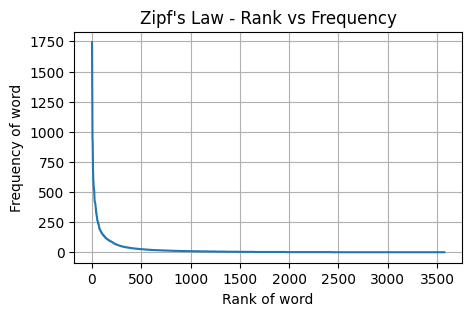

In [ ]:
# Step 1: Prepare rank and frequency lists from sorted word frequencies
ranks = list(range(1, len(sorted_freq) + 1))
frequencies = [count for _, count in sorted_freq]

# Step 2: Plotting Zipf's Law curve
plt.figure(figsize=(5, 3))
plt.plot(ranks, frequencies)
plt.xlabel('Word Rank')
plt.ylabel('Frequency of word')
plt.title("Zipf's Law - Rank vs Frequency")
plt.grid(True)
plt.show()


**Step 10: Zipf's Law in Action**

If the standard frequency-rank plot shows a steep, downward-bending curve, we're already seeing **Zipf’s Law** at play.

But the real test is the **log-log plot** 🔑 —  
When both rank and frequency are plotted on a logarithmic scale, Zipf's Law predicts the curve should straighten out into an almost perfect line.

Let’s plot it and see how closely Rihanna’s lyrics follow this pattern.


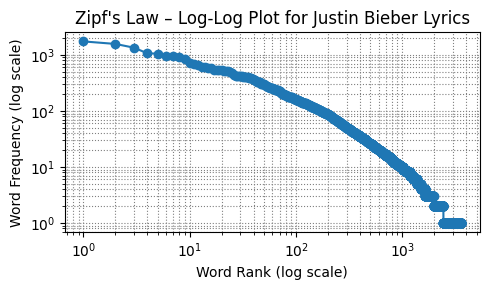

In [ ]:
# Plotting Zipf’s Law on a log–log scale with customized grid
plt.figure(figsize=(5, 3))
plt.loglog(ranks, frequencies, marker='o', linestyle='-')
plt.xlabel('Word Rank (log scale)')
plt.ylabel('Word Frequency (log scale)')
plt.title("Zipf's Law – Log‑Log Plot for Justin Bieber Lyrics")

# Customizing the grid style
plt.grid(True, which='both', color='gray', linestyle=':', linewidth=0.8)

plt.tight_layout()
plt.show()


# 📊 Zipf’s Law Analysis – Does Our Data Follow It?

**Zipf’s Law predicts:**
- A small set of words (e.g., “I”, “you”, “the”) will occur very frequently.
- Most other words will appear rarely.
- Word frequency will decline approximately as **1 / rank**.

---

## 🔍 Visual Verification

### 1️⃣ Rank vs. Frequency Plot (Linear Scale)
This plot shows a **sharp decline**, where a few high-ranking words dominate in frequency.  
It confirms that word usage is **highly skewed**, consistent with the expected Zipfian behavior.

### 2️⃣ Log-Log Plot of Rank vs. Frequency
This plot reveals a **near-linear trend** when both axes are scaled logarithmically.  
A straight line here implies a **power-law relationship** — the key signature of Zipf’s Law.  
The slope reinforces the idea of **inverse proportionality** between rank and frequency.

---

## ✅ Conclusion

Both visualizations strongly support that **Justin Bieber’s lyrics follow Zipf’s Law**.  
This suggests that even within the creative domain of pop music, **natural language patterns persist**, reinforcing the **universal nature** of Zipfian distributions in human communication.

---

## 👥 Team Member Contributions

- **Suryansh Gupta** – Data cleaning, pipeline development, and project coordination.  
- **Shikhar Singh** – Created visualizations, including plots and word clouds.  
- **Pranay Chitare** – Handled documentation, write-ups, and presentation layout design.  
- **Nitin Sahu** – Frequency analysis and development of Zipf’s Law logic.